## Trying to Use My Newly Acquired Knowledge (Nov. 13th, 2022) of Neural Networks to Solve the Used Car Price Prediction Problem

## Importing relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data from the .csv in the specified folder:
raw_data = pd.read_csv("/Users/GoriPNEUMA/Documents/DataSpell Files/Used Cars' Data.csv")

# Let's explore the top 5 rows of the data frame:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
# I will rearrange the data to have the target variable (Price) as the first column,
# ...followed by the numerical variables and then the categorical variables.
raw_data_column_list = list(raw_data) # I list the column titles so I can manually copy and rearrange them.
raw_data_column_list

['Brand',
 'Price',
 'Body',
 'Mileage',
 'EngineV',
 'Engine Type',
 'Registration',
 'Year',
 'Model']

In [4]:
# Rearranging the columns manually and storing the rearrangement in "new_columns":
new_columns = ['Price',
               'Mileage',
               'Year',
               'EngineV',
               'Brand',
               'Body',
               'Engine Type',
               'Registration',
               'Model']
final_raw = raw_data[new_columns]
final_raw # Final raw data with rearranged columns.

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration,Model
0,4200.0,277,1991,2.0,BMW,sedan,Petrol,yes,320
1,7900.0,427,1999,2.9,Mercedes-Benz,van,Diesel,yes,Sprinter 212
2,13300.0,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes,S 500
3,23000.0,240,2007,4.2,Audi,crossover,Petrol,yes,Q7
4,18300.0,120,2011,2.0,Toyota,crossover,Petrol,yes,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,125000.0,9,2014,3.0,Mercedes-Benz,sedan,Diesel,yes,S 350
4341,6500.0,1,1999,3.5,BMW,sedan,Petrol,yes,535
4342,8000.0,194,1985,2.0,BMW,sedan,Petrol,yes,520
4343,14200.0,31,2014,NaN,Toyota,sedan,Petrol,yes,Corolla


## Preprocessing (Data Cleaning)

### Exploring the descriptive statistics of the variables

In [5]:
# Descriptive statistics are very useful for initial exploration of the variables.

final_raw.describe(include='all') # "include" argument is added to include descriptive statistics
                                  # for categorical variables.

# Some of the descriptive statistics are obviously not available for categorical data while
# others are not available for numerical data. For example, categorical data cannot have standard deviations.

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration,Model
count,4173.000000,4345.000000,4345.000000,4195.000000,4345,4345,4345,4345,4345
unique,NaN,NaN,NaN,NaN,7,6,4,2,312
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes,E-Class
freq,NaN,NaN,NaN,NaN,936,1649,2019,3947,199
mean,19418.746935,161.237284,2006.550058,2.790734,NaN,NaN,NaN,NaN,NaN
std,25584.242620,105.705797,6.719097,5.066437,NaN,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN,NaN
25%,6999.000000,86.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN,NaN
50%,11500.000000,155.000000,2008.000000,2.200000,NaN,NaN,NaN,NaN,NaN
75%,21700.000000,230.000000,2012.000000,3.000000,NaN,NaN,NaN,NaN,NaN


### Determining the variables of interest

In [6]:
# For this model, I will drop the "Model" variable as it contains information about other variables.
# This prevents multi-collinearity issues.
data = final_raw.drop(['Model'],axis=1)

# Let's check the descriptive statistics without the "Model" variable.
data.describe(include='all')

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,4173.000000,4345.000000,4345.000000,4195.000000,4345,4345,4345,4345
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,936,1649,2019,3947
mean,19418.746935,161.237284,2006.550058,2.790734,NaN,NaN,NaN,NaN
std,25584.242620,105.705797,6.719097,5.066437,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN
25%,6999.000000,86.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN
50%,11500.000000,155.000000,2008.000000,2.200000,NaN,NaN,NaN,NaN
75%,21700.000000,230.000000,2012.000000,3.000000,NaN,NaN,NaN,NaN


### Dealing with missing values

In [7]:
data.isnull().sum() # Gives us the total number of missing values per variable.

Price           172
Mileage           0
Year              0
EngineV         150
Brand             0
Body              0
Engine Type       0
Registration      0
dtype: int64

In [8]:
# I will simply drop all missing values:
data_no_mv = data.dropna(axis=0) # data_no_mv => data with no missing values.

In [9]:
# Let's now check the descriptive statistics without the missing values:
data_no_mv.describe(include='all')

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,4025.000000,4025.000000,4025.000000,4025.000000,4025,4025,4025,4025
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,880,1534,1861,3654
mean,19552.308065,163.572174,2006.379627,2.764586,NaN,NaN,NaN,NaN
std,25815.734988,103.394703,6.695595,4.935941,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN
25%,6999.000000,90.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN
50%,11500.000000,158.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,21900.000000,230.000000,2012.000000,3.000000,NaN,NaN,NaN,NaN


### Dealing with duplicate values

In [10]:
# Check for total number of duplicate values:
data_no_mv.duplicated().sum()

66

In [11]:
# Remove all duplicate values:
data_no_dup = data_no_mv.drop_duplicates() # data_no_dup => data with no duplicates.
data_no_dup

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
0,4200.0,277,1991,2.0,BMW,sedan,Petrol,yes
1,7900.0,427,1999,2.9,Mercedes-Benz,van,Diesel,yes
2,13300.0,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes
3,23000.0,240,2007,4.2,Audi,crossover,Petrol,yes
4,18300.0,120,2011,2.0,Toyota,crossover,Petrol,yes
...,...,...,...,...,...,...,...,...
4338,11500.0,163,2008,2.5,Volkswagen,van,Diesel,yes
4339,17900.0,35,2014,1.6,Toyota,sedan,Petrol,yes
4340,125000.0,9,2014,3.0,Mercedes-Benz,sedan,Diesel,yes
4341,6500.0,1,1999,3.5,BMW,sedan,Petrol,yes


### Exploring the PDFs

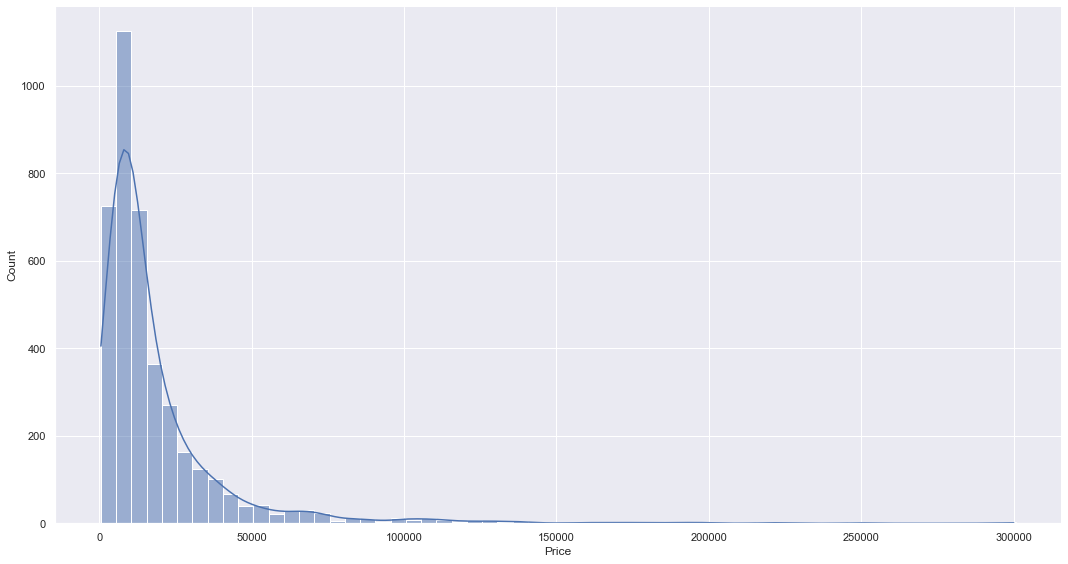

In [12]:
# A great step in the data exploration is to display the probability distribution function (PDF) of each variable.
# The PDF shows us how each variable is distributed and makes it easy to spot anomalies such as outliers.
# The PDF is also often the basis on which we decide whether we want to transform a feature/variable.
# We must also realise that only numerical variables can have a PDF.
sns.displot(data_no_dup['Price'], kde = True, binwidth = 5000, height=8, aspect=15/8) # "Price" PDF

### Dealing with outliers

In [13]:
# Apparently there are some outliers present.
# Prices around $300,000 seem to be excessive for used cars.
# I will remove 1% of the observations from the higher end of "Price" (right side of the graph).
# Outliers can cause heteroscedasticity in our data and we do not want that.

# Let's declare a variable that will be equal to the 99th percentile of the "Price" variable:
q = data_no_dup["Price"].quantile(0.99)

# I will now create a new data frame, with the condition that all prices must be below the 99th
# ...percentile of "Price":
data_1 = data_no_dup[data_no_dup["Price"]<q]

# In this way we have essentially removed the top 1% of the data about "Price". Let's now see the data summary:
data_1.describe(include='all')

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,3918.000000,3918.000000,3918.000000,3918.000000,3918,3918,3918,3918
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,864,1502,1812,3547
mean,17293.577836,166.554109,2006.188106,2.744513,NaN,NaN,NaN,NaN
std,18063.109785,102.497705,6.659415,4.995953,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN
25%,6900.000000,95.000000,2002.000000,1.800000,NaN,NaN,NaN,NaN
50%,11200.000000,160.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,20844.362500,230.000000,2011.000000,3.000000,NaN,NaN,NaN,NaN


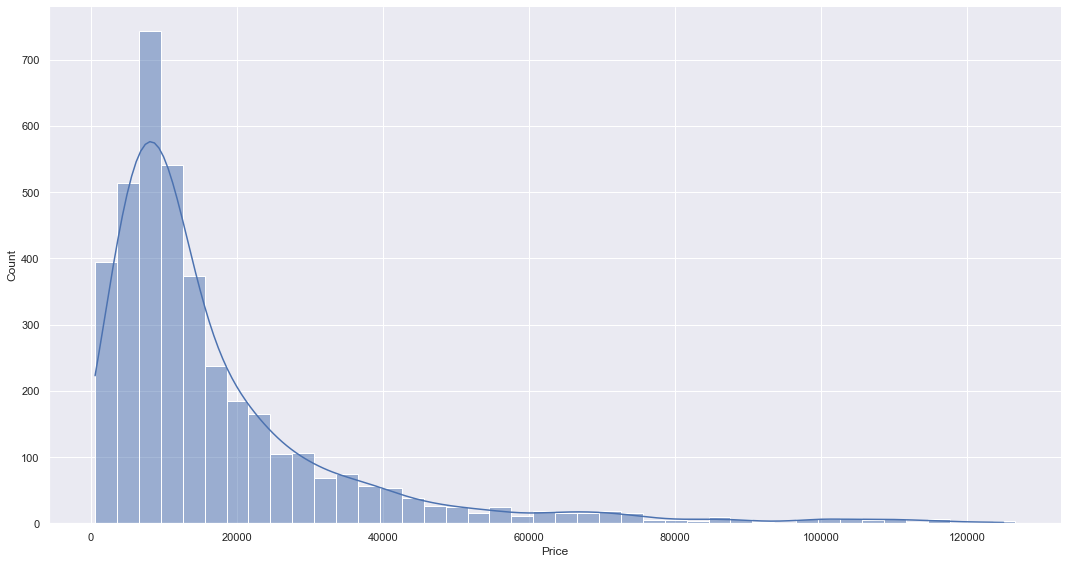

In [14]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall,
# even though there are now much fewer outliers:
sns.displot(data_1["Price"], kde = True, binwidth = 3000, height=8, aspect=15/8)

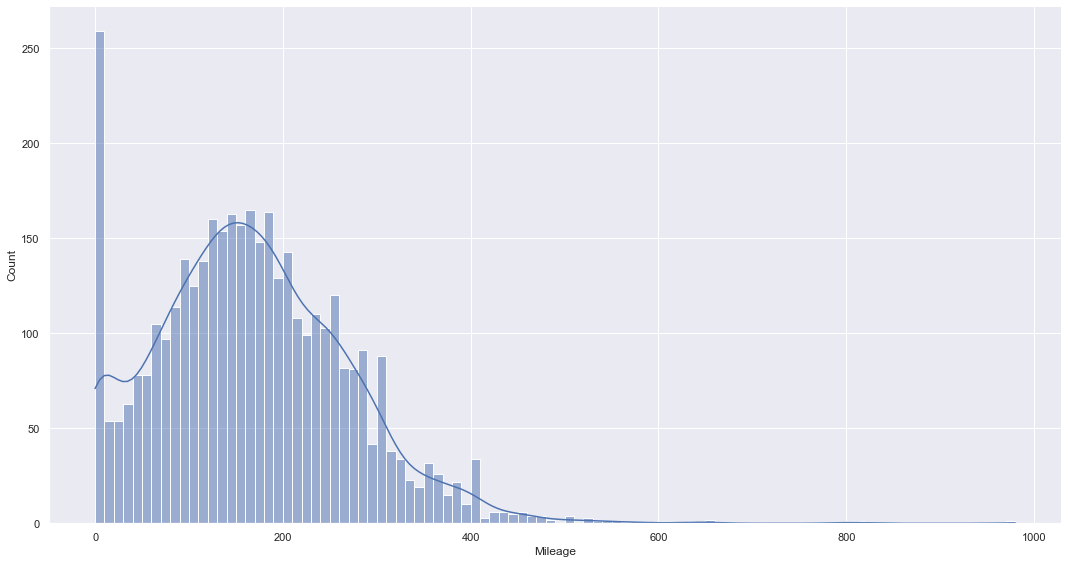

In [15]:
# We can treat the other numerical variables in a similar way. Let's continue with "Mileage":
sns.displot(data_1["Mileage"], kde = True, binwidth = 10, height=8, aspect=15/8)

### I will be removing only the top 0.5% of observations from the Mileage variable. This is because the number of outliers to the right side of the "Mileage" variable are not so many.

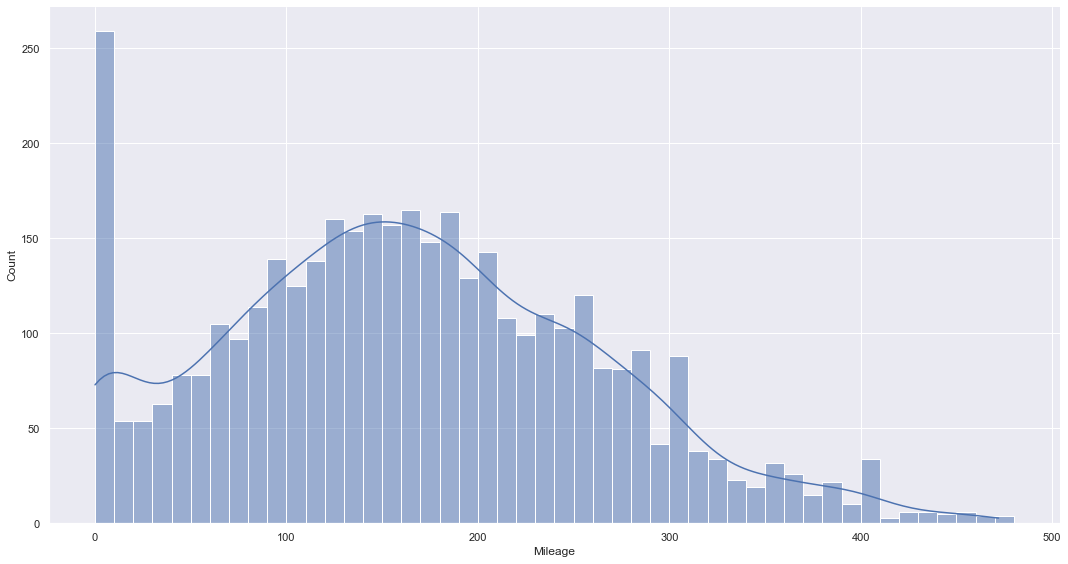

In [16]:
q = data_1["Mileage"].quantile(0.995)
data_2 = data_1[data_1["Mileage"]<q]
sns.displot(data_2["Mileage"], kde = True, binwidth = 10, height=8, aspect=15/8)

#### We can see that the plot above looks kind of normal.

In [17]:
data_2.describe(include="all") # A peek at our data summary after removing "Mileage" outliers.

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,3898.000000,3898.000000,3898.000000,3898.000000,3898,3898,3898,3898
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,856,1496,1796,3527
mean,17321.918409,164.368138,2006.224474,2.746614,NaN,NaN,NaN,NaN
std,18066.857606,97.670069,6.636084,5.008429,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN
25%,6900.000000,95.000000,2002.000000,1.800000,NaN,NaN,NaN,NaN
50%,11200.000000,160.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,20900.000000,230.000000,2011.000000,3.000000,NaN,NaN,NaN,NaN


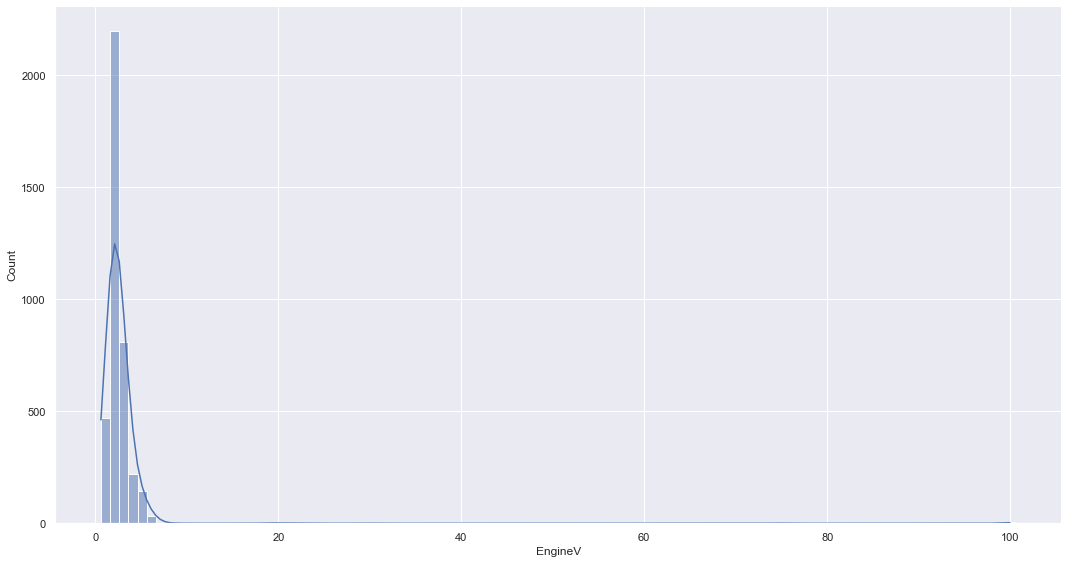

In [18]:
# We can see that the "EngineV" (Engine Volume) variable has unrealistically high figures going up to 100.
sns.displot(data_2["EngineV"], kde = True, binwidth = 1, height=8, aspect=15/8)

### I will assume (from online research) that the highest car engine volume is about 8.4l

In [19]:
# I found online that a few cars (e.g. Dodge Viper V10) can have engine volumes that reach up to 8.4litres.
# It is true that this is a "used car" model, but I can see Mercedes Benz among the sold car brands.
# Mercedes Benz makes fast luxury cars with huge engine volumes.
# Therefore, I will keep all observations with engine volumes less than 8.4:
data_3 = data_2[data_2["EngineV"]<8.4]

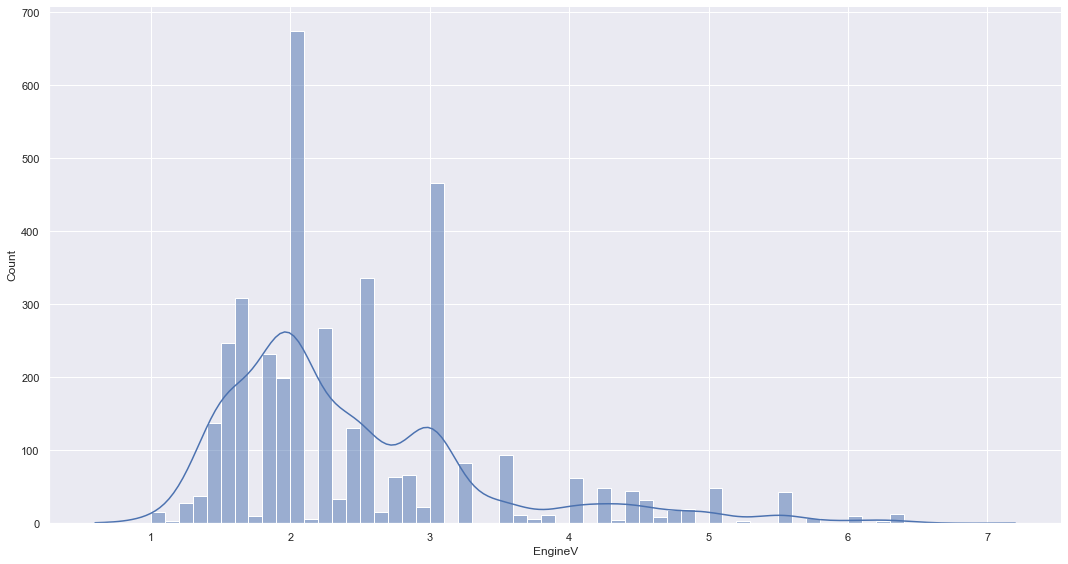

In [20]:
sns.displot(data_3["EngineV"], kde = True, binwidth = 0.1, height=8, aspect=15/8)

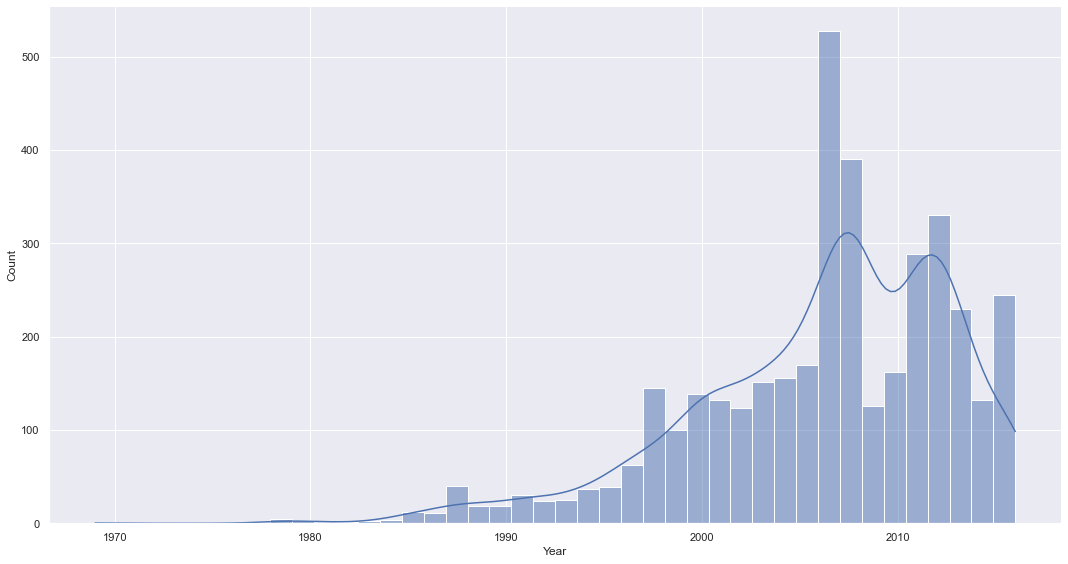

In [21]:
# Finally, the situation with "Year" is similar to "Price" and "Mileage".
# However, the outliers are on the low end as shown in the PDF plot below.
sns.displot(data_3["Year"], kde = True, height=8, aspect=15/8)

### I will be removing only 0.5% of the outliers in the "Year" variable. We still want to try to preserve the range of cars that were sold according to their year of manufacture, but without too many outliers.

In [22]:
q = data_3["Year"].quantile(0.005)
data_4 = data_3[data_3["Year"]>q]

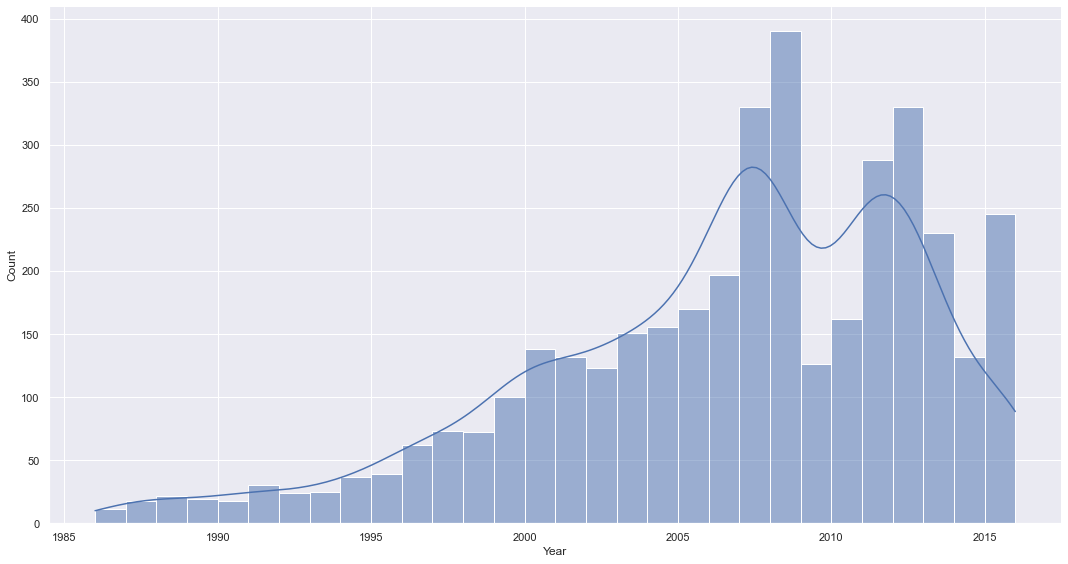

In [23]:
# Here's the new result
sns.displot(data_4["Year"], kde = True, height=8, aspect=15/8)

In [24]:
# As we have been removing observations, the original indexes have been preserved.
# We must now reset the index.
# A new column will be created containing the old index.
# We won't be needing this new column, so the "drop=True" argument is included:
data_cleaned = data_4.reset_index(drop=True)

### Let's now see the descriptive statistics for our final, cleaned data set.
##### Yes, we have removed about 11% overall of the original data set. However, I believe we are still left with a substantial amount of the original data - 3,850 observations!

In [25]:
data_cleaned.describe(include='all')

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,3850.000000,3850.000000,3850.000000,3850.000000,3850,3850,3850,3850
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,845,1468,1783,3485
mean,17469.713691,163.900260,2006.409351,2.443836,NaN,NaN,NaN,NaN
std,18117.594836,97.328474,6.339836,0.950829,NaN,NaN,NaN,NaN
min,800.000000,0.000000,1986.000000,0.600000,NaN,NaN,NaN,NaN
25%,7000.000000,95.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN
50%,11400.000000,160.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,20999.000000,230.000000,2011.000000,3.000000,NaN,NaN,NaN,NaN


#### From the PDF of price, we can determine that "Price" is exponentially distributed. A good transformation in this case is a log transformation.

In [26]:
# I will now do a log transformation on "Price":
log_price = np.log(data_cleaned["Price"])

# Then I will add it to our data frame:
data_cleaned["log_price"] = log_price

# Rearrange the data frame to have "log_price" after "Price":
column_list = list(data_cleaned)
column_list

['Price',
 'Mileage',
 'Year',
 'EngineV',
 'Brand',
 'Body',
 'Engine Type',
 'Registration',
 'log_price']

In [27]:
data_cleaned_column_list = ['Price',
                            'log_price',
                            'Mileage',
                            'Year',
                            'EngineV',
                            'Brand',
                            'Body',
                            'Engine Type',
                            'Registration']
data_cleaned = data_cleaned[data_cleaned_column_list]
data_cleaned

,Price,log_price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
0,4200.0,8.342840,277,1991,2.0,BMW,sedan,Petrol,yes
1,7900.0,8.974618,427,1999,2.9,Mercedes-Benz,van,Diesel,yes
2,13300.0,9.495519,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes
3,23000.0,10.043249,240,2007,4.2,Audi,crossover,Petrol,yes
4,18300.0,9.814656,120,2011,2.0,Toyota,crossover,Petrol,yes
...,...,...,...,...,...,...,...,...,...
3845,2100.0,7.649693,237,2001,1.9,Renault,vagon,Diesel,no
3846,6800.0,8.824678,152,2007,1.6,Renault,sedan,Petrol,yes
3847,11500.0,9.350102,163,2008,2.5,Volkswagen,van,Diesel,yes
3848,17900.0,9.792556,35,2014,1.6,Toyota,sedan,Petrol,yes


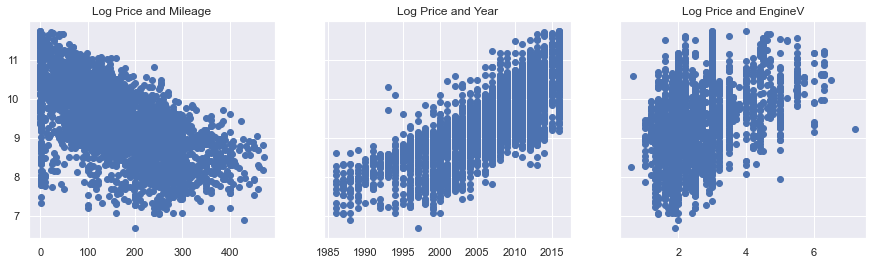

In [28]:
# Let's now check again for linearity between the target and the numerical features.
# Remember we will now be using "log_price" instead of "Price":
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey="all", figsize =(15,4))
ax1.scatter(data_cleaned["Mileage"],data_cleaned["log_price"])
ax1.set_title("Log Price and Mileage")
ax2.scatter(data_cleaned["Year"],data_cleaned["log_price"])
ax2.set_title("Log Price and Year")
ax3.scatter(data_cleaned["EngineV"],data_cleaned["log_price"])
ax3.set_title("Log Price and EngineV")


plt.show()

In [29]:
# We can see from the plots above that there is a linear or near-linear relationship
# between our transformed target and each of our numerical features.
# We can now proceed.
# Since we will be using the log_price variable, we can drop the old "Price" variable.
data_cleaned = data_cleaned.drop(["Price"],axis=1)
data_cleaned

,log_price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
0,8.342840,277,1991,2.0,BMW,sedan,Petrol,yes
1,8.974618,427,1999,2.9,Mercedes-Benz,van,Diesel,yes
2,9.495519,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes
3,10.043249,240,2007,4.2,Audi,crossover,Petrol,yes
4,9.814656,120,2011,2.0,Toyota,crossover,Petrol,yes
...,...,...,...,...,...,...,...,...
3845,7.649693,237,2001,1.9,Renault,vagon,Diesel,no
3846,8.824678,152,2007,1.6,Renault,sedan,Petrol,yes
3847,9.350102,163,2008,2.5,Volkswagen,van,Diesel,yes
3848,9.792556,35,2014,1.6,Toyota,sedan,Petrol,yes


## Create dummy variables

In [30]:
# To include the categorical data in our model, let's create dummies.
# Do not forget to drop one of the dummies (in each category), or else we will introduce (perfect or near
# perfect) multi-collinearity. We do not want that.
data_with_dummies = pd.get_dummies(data_cleaned)

In [31]:
# Here's the result
data_with_dummies.head() # First 5 observations of the data set.

,log_price,Mileage,Year,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,8.342840,277,1991,2.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,8.974618,427,1999,2.9,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,9.495519,358,2003,5.0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,10.043249,240,2007,4.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,9.814656,120,2011,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


### At this point, I will not automatically drop the first dummy of each categorical variable. Instead, I will drop the dummies with the highest number of observations in each category and use them as reference/baseline. Dropping the right dummy may not improve the accuracy of the model but it can improve the interpretability of the predictors' weights at the end of the model building exercise. You may read this article for more info: https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707

In [32]:
# To see which dummy will have the highest number of observations, I will display the summary.
# The values for "top" indicate the most frequently occurring value in each categorical feature.
# For example, there are more Volkswagen brands (845) than any other car brand.
# Another example, there are more registered cars (3,485) than those that are not registered.
data_cleaned.describe(include="all")

,log_price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,3850.000000,3850.000000,3850.000000,3850.000000,3850,3850,3850,3850
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,845,1468,1783,3485
mean,9.379744,163.900260,2006.409351,2.443836,NaN,NaN,NaN,NaN
std,0.874960,97.328474,6.339836,0.950829,NaN,NaN,NaN,NaN
min,6.684612,0.000000,1986.000000,0.600000,NaN,NaN,NaN,NaN
25%,8.853665,95.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN
50%,9.341369,160.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,9.952230,230.000000,2011.000000,3.000000,NaN,NaN,NaN,NaN


In [33]:
list(data_with_dummies) # A list of all dummies, so we can manually drop the ones with the most observations.

['log_price',
 'Mileage',
 'Year',
 'EngineV',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_crossover',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Diesel',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_no',
 'Registration_yes']

In [34]:
data_with_dummies = data_with_dummies.drop(['Brand_Volkswagen','Body_sedan',
                                             'Engine Type_Diesel','Registration_yes'], axis=1)

# Let us now see the data frame with dummies added and one reference dummy per variable dropped.
data_with_dummies

,log_price,Mileage,Year,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Body_crossover,Body_hatch,Body_other,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no
0,8.342840,277,1991,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8.974618,427,1999,2.9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,9.495519,358,2003,5.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,10.043249,240,2007,4.2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,9.814656,120,2011,2.0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,7.649693,237,2001,1.9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3846,8.824678,152,2007,1.6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3847,9.350102,163,2008,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3848,9.792556,35,2014,1.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### Declaring the inputs and the targets

In [35]:
final_data = data_with_dummies # New variable containing updated data set with all features plus target.

# The target (dependent variable) is "log_price"
targets = final_data["log_price"]

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = final_data.drop(["log_price"],axis=1)

### Considering the fact that I want to do a Train-Test-Split, the data scaling (standardisation) should be done after the Train-Test-Split. This is to prevent data leakage and consequently Over-fitting. Whatever transformation will be done on the data before a Train-Test-Split MUST NOT use any information from the potential test data. All we have been doing before now (removal of missing and duplicate observations, log transformation of "Price", checking OLS assumptions, etc.) have not transformed our data with information from the potential test data. However, scaling/standardising our data involves the use of mean and standard deviation (which are calculated from all observations including potential test data, unless we separate our test data first which is what we will now do).

### Train Test Split

In [36]:
# Importing the module for the split:
from sklearn.model_selection import train_test_split

# I will split the observations with an 80%:20% split and a specified random state.
# We use the specified random state to ensure we always get the exact same split
# everytime we run/re-run this part of our code throughout this model building exercise.
# As my alias has 16 characters, I will use 16 as my random state :)
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=16)

### Scale the data
##### We can now proceed with scaling our data (which of course will just be the train data).

In [37]:
# Importing the scaling module:
from sklearn.preprocessing import StandardScaler

# Creating a scaler object:
scaler = StandardScaler()

# Fitting the train inputs (calculates the mean and standard deviation feature-wise)
scaler.fit(x_train)

StandardScaler()

In [38]:
# Scaling the features and storing in a new variable (the actual scaling procedure):
x_train_scaled = scaler.transform(x_train)

***

## Let's now begin using a Neural Network model to solve this car price prediction problem.
Identifying Our Key Variables:

Readied dataset = final_data
Train Inputs (Scaled) = x_train_scaled
Train Targets         = y_train
Test Inputs           = x_test
Test Targets          = y_test

### Let's first check the data types of our variables, we need them to be numpy arrays for the computations.

In [39]:
type(x_train_scaled.dtype)

numpy.dtype[float64]

In [40]:
type(y_train)

pandas.core.series.Series

In [41]:
# Let's convert our "y_train" pandas series into a numpy array:
y_train = y_train.values
type(y_train)

numpy.ndarray

In [42]:
# Let's verify (for the purpose of matrix computations later) the shape of our inputs:
print (x_train_scaled.shape)

(3080, 18)


In [43]:
# Let's verify the shape of our targets:
print(y_train.shape)

(3080,)


In [44]:
# Our targets variable is currently a vector (1-dimensional), we need it to be a matrix (2-dimensional) for
# ...computational purposes later. We will now reshape it:
y_train = y_train.reshape(3080,1)
print(y_train.shape)

(3080, 1)


### Variables have now been converted to np arrays and properly reshaped, let's proceed.

#### As our number of inputs are more than 2 (they are 18 in this case), we cannot plot the training data because the maximum number of dimensions that can be plotted is 3. Let's proceed.

### Initialise variables

In [45]:
# We will now initialise the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables.
# In this case, the weights matrix is 18x1 since there are 18 inputs and one output.
weights = np.random.uniform(low=-init_range, high=init_range, size=(18, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights and bias to get a sense of how they were initialised.
print (weights)
print (biases)

[[-0.07802276]
 [ 0.09643418]
 [ 0.00824759]
 [ 0.08413028]
 [-0.00744743]
 [-0.04627279]
 [-0.05844395]
 [ 0.09766942]
 [-0.03021204]
 [-0.03309055]
 [-0.08491787]
 [ 0.04016743]
 [ 0.02379286]
 [ 0.08799779]
 [-0.03655641]
 [-0.06619678]
 [-0.04247778]
 [ 0.06303177]]
[0.00771771]


### Set a learning rate

In [46]:
# I have earlier experimented with various learning rates and found 0.04 to work quite well.
# It is HIGHLY recommended that we play around with this value to obtain the best results.
learning_rate = 0.04

### Train the model

In [47]:
# I have earlier experimented with various number of iterations and found 200 iterations
# ...to be adequate for convergence.
# Generally, a lower learning rate would need more iterations, while a higher learning rate
# ...would need fewer iterations.
# Keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.
for i in range (200):

    # This is the linear model: y = xw + b
    outputs = np.dot(x_train_scaled,weights) + biases
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 3080 x 1
    deltas = outputs - y_train

    # We are considering the L2-norm loss, but divided by 2.
    # We will further divide it by the number of observations (3080) to obtain the average loss
    # ...per observation (mean loss).
    # This is simple rescaling by a constant. It doesn't change the optimisation logic,
    # ...as any function holding the basic property of being lower for better results, and higher
    # ...for worse results can be a loss function.
    # It should also be noted that this "rescaling" makes the learning of our model independent of
    # ...the number of observations. In other words, we can scale this model to accommodate larger or smaller
    # ... number of observations without altering the values of other variables.
    loss = np.sum(deltas ** 2) / 2 / 3080

    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print (loss)

    # Another small trick is to scale the deltas the same way as the loss function.
    # In this way, our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single
    # ...learning rate that can remain the same even if we change the number of training samples (observations).
    deltas_scaled = deltas / 3080

    # Finally, we must apply the gradient descent update rules.
    # The weights are 18x1 (kxm), learning rate is 1x1 (scalar), inputs are 3080x18 (nxk),
    # ...and deltas_scaled are 3080x1. Don't forget k is the number of inputs, m is the number of outputs
    # ... and n is the number of observations.
    # We must transpose (use .T method on...) the inputs so that its number of rows can match the
    # ...number of columns for "deltas_scaled" and both matrices can be multiplied to obtain an 18x1
    # ...vector for weights, which is the result we expect.
    # We are allowed to safely carry out this operation as transposing a matrix does not change the information the matrix holds.
    weights = weights - learning_rate * np.dot(x_train_scaled.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

    # The weights are updated in a linear algebraic way (an 18x1 matrix minus another 18x1 matrix).
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology.

44.189163721349075
40.704217972765
37.49680543357268
34.544409722538546
31.826412314890074
29.323920554619775
27.019613212344144
24.89760150136961
22.943303753072918
21.14333219665003
19.485390495055547
17.958180864628332
16.551319755526062
15.25526119786884
14.061227027907425
12.96114330248838
11.947582291006166
11.013709503927272
10.153235277529614
9.36037048712949
8.629786006948073
7.956575574889069
7.336221755689349
6.764564726864459
6.237773639190437
5.7523203276404535
5.304955170150992
4.892684910685814
4.512752280100999
4.162617263550946
3.8399398768351904
3.5425643263599516
3.268504438440201
3.01593025363899
2.7831556908532855
2.5686271940154066
2.370913281679037
2.1886949264791147
2.020756697566422
1.865978604682457
1.723328587612871
1.5918555993866526
1.4706832358162814
1.3590038678392575
1.256073236657641
1.161205474909912
1.0737685200755913
0.9931798890321659
0.9189027851776713
0.8504425118207231
0.7873431676405741
0.7291846019490852
0.6755796092589877
0.626171344291693
0.5

#### We can see the results from the 200 iterations above, they seem to have converged quite well as there is no significant change from the value 0.042.

### Print weights and biases.

In [48]:
# We print the updated weights and the biases (the final values for weights and biases after all the
# ...iterations in the previous code cell).
# We will use these weights and biases to compute the general model (y = xw + b) so we can obtain our
# ...outputs which are the predictions of our Neural Network model.
# Also, the weights show the relative contribution of each of our inputs to the model.
print (weights, biases)

[[-0.13125069]
 [ 0.48026049]
 [ 0.21174644]
 [ 0.07291577]
 [ 0.10383935]
 [ 0.08861715]
 [-0.07551718]
 [-0.12802962]
 [ 0.00565784]
 [ 0.12672208]
 [-0.02519023]
 [ 0.01370934]
 [-0.00978953]
 [-0.04501786]
 [-0.04449565]
 [-0.01672252]
 [-0.06004838]
 [-0.26442864]] [9.36596235]


### Print the outputs and compare them to the targets and see how close these are. The closer they are, the better our model. This will also inform us if we need to perform further tweaks like adjusting the learning rate and/or increasing the number of iterations.

In [49]:
# What we want to do now is compare the outputs to the targets in a dataframe. Our outputs and targets
# ...are currently numpy arrays, so we will first convert them to pandas dataframes and combine them into
# ...a single dataframe for easy comparison.

In [50]:
outputs_df = pd.DataFrame(outputs)
type(outputs_df)

pandas.core.frame.DataFrame

In [51]:
y_train_df = pd.DataFrame(y_train)
type(y_train_df)

pandas.core.frame.DataFrame

#### Let's not forget we need to reverse the natural log transformations we did to the price variable to obtain the prices. We will do this by finding the exponential.

In [52]:
y_train_df = np.exp(y_train_df)
outputs_df = np.exp(outputs_df)

In [53]:
# Let's now combine the outputs (model predictions for price) and the targets (actual prices) in a single
# dataframe for easy comparison.
comparison = pd.concat([outputs_df, y_train_df], axis=1, ignore_index=True)
comparison

,0,1
0,9475.792813,7150.0
1,8470.317332,8300.0
2,14113.582172,9950.0
3,20064.227864,16400.0
4,16779.166879,40000.0
...,...,...
3075,14415.901269,11500.0
3076,18158.475796,11900.0
3077,6033.832647,8800.0
3078,10659.292276,10900.0


#### We will properly format and label the dataframe, but first let's add two more columns to facilitate our comparison.

In [54]:
# The first column we want to add is the difference between the predicted prices and the actual prices:
difference = pd.DataFrame(abs(comparison[0] - comparison[1]))
difference

,0
0,2325.792813
1,170.317332
2,4163.582172
3,3664.227864
4,23220.833121
...,...
3075,2915.901269
3076,6258.475796
3077,2766.167353
3078,240.707724


In [55]:
# The second column we will add is the percentage difference between the predicted prices and the actual prices:
percent_difference = pd.DataFrame((difference[0] / comparison[0]) * 100)
percent_difference

,0
0,24.544572
1,2.010755
2,29.500534
3,18.262491
4,138.390859
...,...
3075,20.226979
3076,34.465865
3077,45.844284
3078,2.258196


In [56]:
# Combining all dataframes into one:
comparison_1 = pd.concat([comparison, difference, percent_difference], axis=1, ignore_index=True)
comparison_1

,0,1,2,3
0,9475.792813,7150.0,2325.792813,24.544572
1,8470.317332,8300.0,170.317332,2.010755
2,14113.582172,9950.0,4163.582172,29.500534
3,20064.227864,16400.0,3664.227864,18.262491
4,16779.166879,40000.0,23220.833121,138.390859
...,...,...,...,...
3075,14415.901269,11500.0,2915.901269,20.226979
3076,18158.475796,11900.0,6258.475796,34.465865
3077,6033.832647,8800.0,2766.167353,45.844284
3078,10659.292276,10900.0,240.707724,2.258196


In [57]:
# Renaming columns of dataframe:
comparison_final = comparison_1.rename(columns={0: "Predicted Prices", 1: "Actual Prices",
                                                2: "Price Difference", 3: "% Price Difference"})
comparison_final

,Predicted Prices,Actual Prices,Price Difference,% Price Difference
0,9475.792813,7150.0,2325.792813,24.544572
1,8470.317332,8300.0,170.317332,2.010755
2,14113.582172,9950.0,4163.582172,29.500534
3,20064.227864,16400.0,3664.227864,18.262491
4,16779.166879,40000.0,23220.833121,138.390859
...,...,...,...,...
3075,14415.901269,11500.0,2915.901269,20.226979
3076,18158.475796,11900.0,6258.475796,34.465865
3077,6033.832647,8800.0,2766.167353,45.844284
3078,10659.292276,10900.0,240.707724,2.258196


In [58]:
comparison_final.describe()

,Predicted Prices,Actual Prices,Price Difference,% Price Difference
count,3080.000000,3080.000000,3080.000000,3080.000000
mean,15878.765014,17194.271896,3951.926237,22.507295
std,12823.895672,17778.002545,7397.532708,24.397059
min,983.022352,800.000000,0.087272,0.000488
25%,7077.178576,6999.000000,712.138375,7.460195
50%,12222.534352,11300.000000,1697.316271,16.706187
75%,20716.574440,20733.437500,3966.289593,29.317274
max,88665.691467,124999.000000,83002.294881,320.366533


## Testing the Neural Network Model

#### We will use the general linear equation: y = xw + b to predict the outputs for our test input data (x_test). We will obtain w and b from the weights and biases printed after the model training and our x will be x_test. Afterwards, we will compare our predicted outputs with the output test data (y_test) to see how well our NN model did in the prediction of the prices of the used cars.

In [59]:
# Before we proceed with the test, let's scale x_test first:
scaler.fit(x_test)

# Scaling the features and storing in a new variable (the actual scaling procedure):
x_test_scaled = scaler.transform(x_test)

In [60]:
# Let's now employ the linear equation for our predictions:

outputs_test = np.dot(x_test_scaled, weights) + biases
outputs_test

array([[ 8.79009452],
       [ 9.04956227],
       [ 9.34914516],
       [10.02181015],
       [ 9.01813632],
       [ 8.03180383],
       [10.04247213],
       [ 7.89388794],
       [ 8.79083042],
       [ 9.65009801],
       [ 7.60478145],
       [ 8.90963889],
       [ 9.27305991],
       [ 9.54666463],
       [ 9.80772373],
       [ 9.84263931],
       [ 9.57559547],
       [ 8.7427701 ],
       [ 9.99631823],
       [10.9337515 ],
       [ 9.84446314],
       [ 8.72567019],
       [ 9.54756557],
       [ 8.67721255],
       [10.62064001],
       [ 9.36830233],
       [ 9.30540609],
       [ 7.92365707],
       [10.13209367],
       [ 9.9320023 ],
       [ 9.03422077],
       [ 8.09544148],
       [ 8.58337319],
       [ 8.72365292],
       [ 8.10196352],
       [ 9.69985406],
       [ 9.56673169],
       [ 7.60405689],
       [ 9.3049181 ],
       [ 9.54558647],
       [ 9.52603303],
       [ 9.79354597],
       [10.19524422],
       [10.63151411],
       [ 9.14037269],
       [ 9

In [61]:
# Let's not forget to compute the exponential of the predicted outputs to get the predicted prices:
outputs_test = np.exp(outputs_test)
outputs_test

array([[ 6568.85304859],
       [ 8514.80988022],
       [11488.99793838],
       [22512.14332924],
       [ 8251.38477862],
       [ 3077.28757945],
       [22982.12763127],
       [ 2680.84665943],
       [ 6573.68881195],
       [15523.30953365],
       [ 2007.77305213],
       [ 7402.98735932],
       [10647.28186706],
       [13997.92848651],
       [18173.57192326],
       [18819.32061261],
       [14408.81532563],
       [ 6265.22701928],
       [21945.51843065],
       [56036.10520405],
       [18853.67518163],
       [ 6159.003008  ],
       [14010.5454781 ],
       [ 5867.66792958],
       [40971.82897232],
       [11711.21647425],
       [10997.31127498],
       [ 2761.85289662],
       [25136.93786746],
       [20578.50374936],
       [ 8385.17693113],
       [ 3279.4843634 ],
       [ 5342.0950441 ],
       [ 6146.59116358],
       [ 3300.9431766 ],
       [16315.22592874],
       [14281.66303691],
       [ 2006.31881901],
       [10991.94593661],
       [13982.84460169],


#### We will now combine the predicted prices (outputs_test) with the actual prices (y_test) in the same dataframe for easy comparison. We will also add the extra 2 columns (Price Difference and % Price Difference) just like we did for the train data.

In [62]:
# Before putting outputs_test in a dataframe with y_test, let's first convert it to a dataframe.
# We can use the code: "type(outputs_test)" to confirm that it's currently a numpy array.
outputs_test_df = pd.DataFrame(outputs_test)
outputs_test_df

,0
0,6568.853049
1,8514.809880
2,11488.997938
3,22512.143329
4,8251.384779
...,...
765,6209.329292
766,14458.602019
767,12553.757698
768,8922.520692


In [63]:
# Let's take a quick look at y_test (which is already a pandas series):
y_test

327     9.024011
549     9.615805
2030    9.574983
2583    9.495591
1891    8.699348
          ...   
951     8.433812
2980    9.609116
2723    9.230143
1719    9.210240
1366    9.200290
Name: log_price, Length: 770, dtype: float64

In [64]:
# We can see that the indexing has been disrupted, so we must reset the index to avoid having NaN values in the
# ... dataframe which will combine outputs_test_df (the dataframe containing predicted prices) and y_test.
y_test = y_test.reset_index(drop=True)
y_test

0      9.024011
1      9.615805
2      9.574983
3      9.495591
4      8.699348
         ...   
765    8.433812
766    9.609116
767    9.230143
768    9.210240
769    9.200290
Name: log_price, Length: 770, dtype: float64

In [65]:
# Also, let's not forget to find the exponential of y_test, so we can obtain the actual prices:
y_test = np.exp(y_test)
y_test

0       8300.00
1      15000.00
2      14400.00
3      13300.95
4       5999.00
         ...   
765     4600.00
766    14900.00
767    10200.00
768     9999.00
769     9900.00
Name: log_price, Length: 770, dtype: float64

In [66]:
# Let's now combine the predicted prices (outputs_test_df) and the actual prices (y_test) in a dataframe.

comparison_test = pd.concat([outputs_test_df, y_test], axis=1, ignore_index=True)
comparison_test

,0,1
0,6568.853049,8300.00
1,8514.809880,15000.00
2,11488.997938,14400.00
3,22512.143329,13300.95
4,8251.384779,5999.00
...,...,...
765,6209.329292,4600.00
766,14458.602019,14900.00
767,12553.757698,10200.00
768,8922.520692,9999.00


In [67]:
# Computing difference between the predicted prices and the actual prices:
difference_test = pd.DataFrame(abs(comparison_test[0] - comparison_test[1]))
difference_test

,0
0,1731.146951
1,6485.190120
2,2911.002062
3,9211.193329
4,2252.384779
...,...
765,1609.329292
766,441.397981
767,2353.757698
768,1076.479308


In [68]:
# Computing the percentage difference between the predicted prices and the actual prices:
percent_difference_test = pd.DataFrame((difference_test[0] / comparison_test[0]) * 100)
percent_difference_test

,0
0,26.353869
1,76.163651
2,25.337302
3,40.916554
4,27.297052
...,...
765,25.917925
766,3.052840
767,18.749428
768,12.064744


In [69]:
# Combining all dataframes for effective comparison:
comparison_test_final = pd.concat([comparison_test, difference_test, percent_difference_test],
                            axis=1, ignore_index=True)
comparison_test_final

,0,1,2,3
0,6568.853049,8300.00,1731.146951,26.353869
1,8514.809880,15000.00,6485.190120,76.163651
2,11488.997938,14400.00,2911.002062,25.337302
3,22512.143329,13300.95,9211.193329,40.916554
4,8251.384779,5999.00,2252.384779,27.297052
...,...,...,...,...
765,6209.329292,4600.00,1609.329292,25.917925
766,14458.602019,14900.00,441.397981,3.052840
767,12553.757698,10200.00,2353.757698,18.749428
768,8922.520692,9999.00,1076.479308,12.064744


In [70]:
# Renaming all columns appropriately:
comparison_test_final = comparison_test_final.rename(columns={0: "Predicted Prices", 1: "Actual Prices", 2: "Price Difference", 3: "% Price Difference"})
comparison_test_final

,Predicted Prices,Actual Prices,Price Difference,% Price Difference
0,6568.853049,8300.00,1731.146951,26.353869
1,8514.809880,15000.00,6485.190120,76.163651
2,11488.997938,14400.00,2911.002062,25.337302
3,22512.143329,13300.95,9211.193329,40.916554
4,8251.384779,5999.00,2252.384779,27.297052
...,...,...,...,...
765,6209.329292,4600.00,1609.329292,25.917925
766,14458.602019,14900.00,441.397981,3.052840
767,12553.757698,10200.00,2353.757698,18.749428
768,8922.520692,9999.00,1076.479308,12.064744


In [71]:
comparison_test_final.describe()

,Predicted Prices,Actual Prices,Price Difference,% Price Difference
count,770.000000,770.000000,770.000000,770.000000
mean,15888.176875,18571.480870,4774.101421,25.824231
std,12453.491189,19389.733947,9084.179740,26.387926
min,1042.426896,1150.000000,2.141645,0.021961
25%,7132.621743,7025.000000,879.729336,8.919212
50%,11991.781693,11650.000000,1898.787856,18.790776
75%,21522.710229,22500.000000,4319.800012,34.322573
max,67066.713246,116500.000000,77491.694253,230.703099


## A few insights from the final results:

1. The average percentage price difference between the actual prices and the prices predicted by our Neural Network model for the test data is 25.8%.
2. For 75% of the test data, the percentage price differences between predicted prices and actual prices do not exceed 34.3%.
3. The maximum percentage price difference between predicted prices and actual prices is 230.7%; obviously this is
 quite high but it is worthy of note that considering the two preceding points, our model has done reasonably well
 in predicting the prices for majority of the dataset.